In [1]:
import sys
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from instance import Instance
from utils import sweep_groups, sort_group_by_subst_dist, prim, get_turb_out_power

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

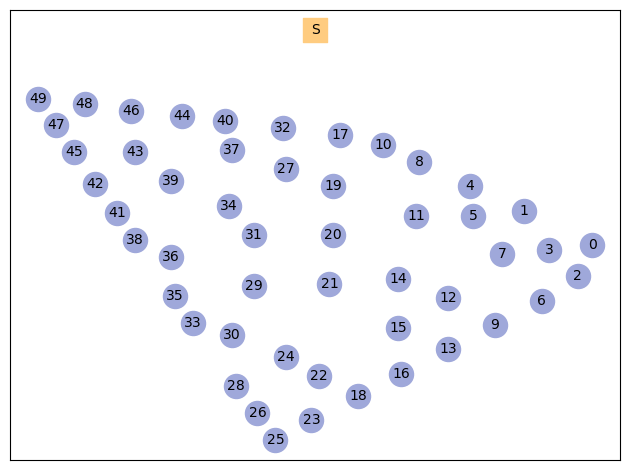

In [3]:
G = nx.DiGraph()
G.add_node('S', pos=(0, 0))
for i in range(len(I.turbs)):
    G.add_node(i, pos=I.turbs[i])
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos,
                       nodelist=['S'],
                       node_color='#FFCC80',
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(len(I.turbs)),
                       node_color='#9FA8DA')
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()

In [4]:
groups = sweep_groups(len(I.turbs),
                      starting_index=8,
                      clockwise=True,
                      tpg = len(I.turbs)//I.C + 1)
groups = [sort_group_by_subst_dist(group, I.dist) for group in groups]

In [5]:
edges_group = [prim(group, I.dist, group[0]) for group in groups]

/tmp/ipykernel_9032/3946637480.py:18: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


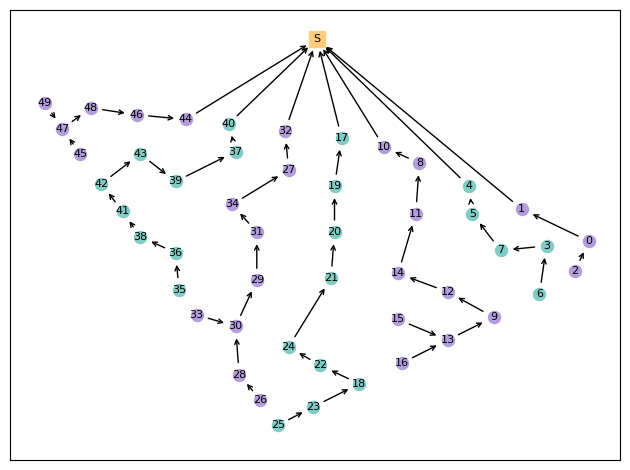

In [6]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=['S'],
                       node_color='#FFCC80',
                       node_size=120,
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2],
                           node_shape='.')
for edges in edges_group:
    nx.draw_networkx_edges(G, pos,
                           edgelist=edges,
                           arrowstyle='->',
                           arrowsize=8)
for group in groups:
    nx.draw_networkx_edges(G, pos,
                           edgelist=[[group[0], 'S']],
                           arrowstyle='->',
                           arrowsize=8)
nx.draw_networkx_labels(G, pos,
                        font_size=8)
plt.tight_layout()
plt.show()

In [7]:
powers = [get_turb_out_power(groups[i], edges_group[i]) for i in range(len(groups))]
power = dict()
for p in powers:
    power |= p
print(power)

{1: 3, 0: 2, 2: 1, 4: 5, 5: 4, 7: 3, 3: 2, 6: 1, 10: 9, 8: 8, 11: 7, 14: 6, 12: 5, 15: 1, 9: 4, 13: 3, 16: 1, 17: 9, 19: 8, 20: 7, 21: 6, 24: 5, 22: 4, 18: 3, 23: 2, 25: 1, 32: 9, 27: 8, 34: 7, 31: 6, 29: 5, 33: 1, 30: 4, 28: 2, 26: 1, 40: 9, 37: 8, 43: 6, 39: 7, 42: 5, 41: 4, 38: 3, 36: 2, 35: 1, 44: 6, 46: 5, 48: 4, 47: 3, 49: 1, 45: 1}


/tmp/ipykernel_9032/2283664079.py:18: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


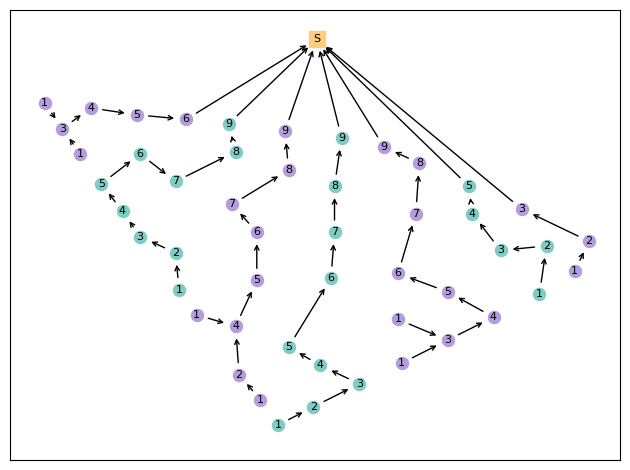

In [8]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=['S'],
                       node_color='#FFCC80',
                       node_size=120,
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2],
                           node_shape='.')
for edges in edges_group:
    nx.draw_networkx_edges(G, pos,
                           edgelist=edges,
                           arrowstyle='->',
                           arrowsize=8)
for group in groups:
    nx.draw_networkx_edges(G, pos,
                           edgelist=[[group[0], 'S']],
                           arrowstyle='->',
                           arrowsize=8)
nx.draw_networkx_labels(G, pos,
                        font_size=8,
                        labels=power|{'S': 'S'})
plt.tight_layout()
plt.show()